# 2. Data preprocess & expolore

## 2.1 Make dataframe with raw data

- Check data list

#### 상해거래소, 대련거래소, 정주거래소에서 거래되는 2020년 8월 3일부터 2020년 11월 24일까지의 34개의 선물 데이터

### 구글드라이브 비즈랩 폴더에서 **중국선물 폴더를 우클릭 한 후** 
### 드라이브에 바로가기 추가 -> 내 드라이브 바로가기 추가 하시면 됩니다.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import notebook
from pathlib import Path
from datetime import datetime, timedelta
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
path = '/content/drive/MyDrive/중국 선물/data/future_data.csv'
future_data = pd.read_csv(path, index_col = 0, parse_dates = True)

In [5]:
# 가격
def preprocessing_price(data):
    
    temp_return = data.applymap(np.log)
    temp_return = temp_return.diff()
    
    date = []
    for i in ['0900','1030','1330','2100']:
        temp_date = list(temp_return.index[temp_return.index.strftime('%H%M') == i])
        date += temp_date
    
    temp_return.loc[date] = np.nan
    return temp_return.dropna()

In [6]:
rtn = preprocessing_price(future_data)

In [7]:
rtn

,KQ.m@SHFE.cu,KQ.m@SHFE.al,KQ.m@SHFE.zn,KQ.m@SHFE.rb,KQ.m@SHFE.bu,KQ.m@SHFE.hc,KQ.m@SHFE.ag,KQ.m@DCE.c,KQ.m@DCE.cs,KQ.m@DCE.a,KQ.m@DCE.b,KQ.m@DCE.m,KQ.m@DCE.y,KQ.m@DCE.p,KQ.m@DCE.l,KQ.m@DCE.pg,KQ.m@DCE.v,KQ.m@DCE.pp,KQ.m@DCE.i,KQ.m@DCE.eg,KQ.m@CZCE.CF,KQ.m@CZCE.SR,KQ.m@CZCE.TA,KQ.m@CZCE.OI,KQ.m@CZCE.MA,KQ.m@CZCE.FG,KQ.m@CZCE.ZC,KQ.m@CZCE.RM,KQ.m@CZCE.SF,KQ.m@CZCE.SM,KQ.m@CZCE.AP,KQ.m@CZCE.SA,KQ.m@CZCE.UR
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-03 09:01:00,0.001575,0.001031,-0.000265,0.001055,-0.002130,0.001031,0.000704,0.000000,-0.001482,0.000840,0.000000,-0.001374,0.000000,-0.000343,0.001432,-0.002903,0.001509,0.000395,0.000000,-0.001614,0.000417,-0.000592,-0.000559,0.000570,-0.001170,0.002873,0.000726,-0.001263,0.000722,-0.001597,0.000980,0.002255,0.001168
2020-08-03 09:02:00,-0.002363,-0.001375,-0.004511,0.001317,-0.001422,0.001030,0.001231,0.000868,0.000741,0.003143,0.003254,0.002060,0.004038,0.004107,0.000000,-0.002646,-0.001509,0.000659,-0.000586,-0.000808,0.000000,0.001380,-0.000559,0.004096,-0.001757,0.000574,-0.001089,0.002104,0.001802,-0.000320,-0.003504,0.003747,0.000583
2020-08-03 09:03:00,-0.003555,-0.000344,0.000798,-0.001053,-0.002138,-0.001803,0.001580,0.000000,-0.000371,-0.001047,-0.000591,-0.001029,-0.000620,0.000683,0.000000,0.001324,0.000755,0.000395,0.000586,0.000539,-0.001669,-0.001183,-0.000559,-0.000341,0.000000,-0.002871,-0.000726,-0.001262,-0.000720,-0.001600,-0.004644,-0.002996,0.001748
2020-08-03 09:04:00,-0.000990,-0.001721,-0.002128,0.000000,0.002849,-0.000258,-0.000526,0.000434,0.000371,0.001465,0.001771,0.001029,0.000000,-0.000341,0.000715,0.001586,0.000000,0.000132,0.000000,0.001077,0.000000,0.000789,0.000559,0.002836,0.001172,0.001724,-0.000363,0.000000,-0.000360,0.000320,0.002395,0.001499,0.000000
2020-08-03 09:05:00,-0.001387,-0.000345,-0.005073,-0.001582,-0.004277,-0.000774,-0.001229,-0.003474,-0.004084,-0.000209,-0.002658,-0.001716,-0.001241,-0.001367,-0.001431,-0.001322,0.001508,-0.000527,-0.002347,-0.000807,-0.001254,-0.000789,-0.001119,-0.002154,-0.003519,0.001147,0.000000,-0.001685,-0.000361,-0.002243,-0.009047,0.005975,-0.000582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-24 14:55:00,0.000183,-0.000632,-0.000238,-0.000256,-0.001663,0.000000,-0.000204,0.000389,0.000347,0.000000,0.000000,0.000309,0.000518,0.000000,-0.000621,-0.000562,-0.000672,-0.000227,-0.000571,0.000259,0.001030,0.000777,0.000000,0.000307,-0.000872,0.000000,-0.000976,0.000000,-0.000652,-0.000639,-0.000418,0.000000,0.000000
2020-11-24 14:56:00,0.000548,0.000316,0.000000,0.000000,0.000832,0.000247,0.000817,0.000000,0.000347,0.000742,0.000260,0.000309,-0.000259,-0.000595,-0.000621,0.000000,0.000000,-0.001022,0.000000,-0.000776,0.000000,0.000194,-0.001147,0.000102,-0.000436,0.000542,-0.000651,0.000000,-0.000326,0.000320,0.000696,-0.000669,0.000563
2020-11-24 14:57:00,0.000183,0.000000,0.000000,-0.000511,-0.001664,-0.000247,0.000612,-0.000389,-0.000694,0.000185,-0.000521,0.000000,-0.001037,-0.000595,-0.001866,-0.000281,-0.000673,0.000114,-0.001714,0.000518,-0.000343,-0.000389,0.000000,-0.000307,0.000872,0.000000,-0.000326,0.000000,-0.000326,0.000000,-0.000557,0.000669,0.000563


## 2.2 Expore price & return

 - Summary stat

In [8]:
from scipy.stats import skew, kurtosis
from statsmodels.stats.stattools import jarque_bera

def desc_statics(data):
    describe = data.describe()
    # 왜도
    describe.loc["skew"] = skew(data)

    # 첨도
    describe.loc["kurt"] = kurtosis(data, fisher = False)

    #자크베라
    describe.loc["j_b"] = jarque_bera(data)[0]
    
    return describe

## 선물 기초통계량

In [9]:
desc_statics(rtn).T

,count,mean,std,min,25%,50%,75%,max,skew,kurt,j_b
KQ.m@SHFE.cu,16872.0,1.889688e-06,0.000396,-0.003735,-0.000194,0.0,0.000194,0.008120,0.523311,18.841616,1.771927e+05
KQ.m@SHFE.al,16872.0,8.143735e-07,0.001203,-0.016232,-0.000341,0.0,0.000341,0.015173,-0.129370,90.376177,5.367168e+06
KQ.m@SHFE.zn,16872.0,4.671949e-06,0.000984,-0.014964,-0.000259,0.0,0.000259,0.015275,-0.261359,118.818381,9.430162e+06
KQ.m@SHFE.rb,16872.0,-3.809094e-06,0.000737,-0.017369,-0.000270,0.0,0.000270,0.017893,-0.222974,216.478122,3.203789e+07
KQ.m@SHFE.bu,16872.0,-5.127453e-06,0.001033,-0.010582,-0.000783,0.0,0.000772,0.006729,-0.055649,5.490341,4.368572e+03
KQ.m@SHFE.hc,16872.0,-4.782041e-06,0.000493,-0.003201,-0.000263,0.0,0.000263,0.002576,-0.106852,4.954225,2.716861e+03
KQ.m@SHFE.ag,16872.0,-6.885771e-06,0.000822,-0.008263,-0.000390,0.0,0.000389,0.006923,-0.356467,11.573903,5.203612e+04
KQ.m@DCE.c,16872.0,1.196973e-06,0.001304,-0.020132,-0.000393,0.0,0.000393,0.020150,-0.313311,129.360133,1.122499e+07
KQ.m@DCE.cs,16872.0,-3.443205e-06,0.001808,-0.037563,-0.000359,0.0,0.000361,0.035256,-0.366009,282.951636,5.509654e+07
KQ.m@DCE.a,16872.0,5.212456e-06,0.003023,-0.076858,-0.000394,0.0,0.000412,0.076363,-0.053557,546.603803,2.077401e+08


In [10]:
corr = rtn.corr()
corr

,KQ.m@SHFE.cu,KQ.m@SHFE.al,KQ.m@SHFE.zn,KQ.m@SHFE.rb,KQ.m@SHFE.bu,KQ.m@SHFE.hc,KQ.m@SHFE.ag,KQ.m@DCE.c,KQ.m@DCE.cs,KQ.m@DCE.a,KQ.m@DCE.b,KQ.m@DCE.m,KQ.m@DCE.y,KQ.m@DCE.p,KQ.m@DCE.l,KQ.m@DCE.pg,KQ.m@DCE.v,KQ.m@DCE.pp,KQ.m@DCE.i,KQ.m@DCE.eg,KQ.m@CZCE.CF,KQ.m@CZCE.SR,KQ.m@CZCE.TA,KQ.m@CZCE.OI,KQ.m@CZCE.MA,KQ.m@CZCE.FG,KQ.m@CZCE.ZC,KQ.m@CZCE.RM,KQ.m@CZCE.SF,KQ.m@CZCE.SM,KQ.m@CZCE.AP,KQ.m@CZCE.SA,KQ.m@CZCE.UR
KQ.m@SHFE.cu,1.000000,0.088819,0.212406,0.134432,0.170265,0.192826,0.235781,0.027478,0.010337,0.017501,0.103476,0.105115,0.099478,0.051692,0.100507,0.109805,0.068248,0.088690,0.197598,0.046793,0.029129,0.110327,0.028600,0.038829,0.026620,0.049218,0.010903,0.068354,0.053974,0.067543,-0.006364,0.014019,0.027750
KQ.m@SHFE.al,0.088819,1.000000,0.043530,0.031371,0.022601,0.038609,0.026497,0.011248,0.004021,0.006897,0.018267,0.029312,0.019339,0.007895,0.008303,0.016486,0.006798,0.012861,0.024585,0.010159,0.009443,0.013804,0.009044,0.003365,0.011098,0.012992,0.005605,0.011885,0.008344,0.015046,-0.000267,0.004073,0.007568
KQ.m@SHFE.zn,0.212406,0.043530,1.000000,0.059481,0.061057,0.096493,0.102243,0.002422,0.007073,0.011904,0.050056,0.054413,0.054718,0.029797,0.040912,0.061647,0.034984,0.036712,0.088897,0.025037,0.013355,0.050492,0.013144,0.013942,0.019717,0.015571,0.003668,0.038254,0.014321,0.030846,0.005452,0.003862,0.013550
KQ.m@SHFE.rb,0.134432,0.031371,0.059481,1.000000,0.108978,0.438391,0.085193,0.014289,0.015648,0.013903,0.058786,0.067035,0.084400,0.039860,0.079667,0.087622,0.055473,0.060187,0.368443,0.034201,0.017869,0.065661,0.026565,0.027788,0.020041,0.059861,0.019226,0.044772,0.052663,0.085857,0.007125,0.020146,0.026966
KQ.m@SHFE.bu,0.170265,0.022601,0.061057,0.108978,1.000000,0.162883,0.128391,0.022777,0.019878,0.006679,0.081748,0.070388,0.099628,0.048554,0.137605,0.161547,0.069245,0.102886,0.169875,0.074698,0.019342,0.081710,0.039048,0.032717,0.042069,0.045747,0.015697,0.052824,0.026397,0.060167,0.013767,0.024804,0.022661
KQ.m@SHFE.hc,0.192826,0.038609,0.096493,0.438391,0.162883,1.000000,0.117119,0.020759,0.020950,0.008431,0.100096,0.103185,0.126018,0.058083,0.120648,0.122028,0.069625,0.083741,0.505052,0.045034,0.026376,0.082166,0.035640,0.041355,0.024060,0.085578,0.023791,0.073872,0.079907,0.107050,0.013590,0.026065,0.045418
KQ.m@SHFE.ag,0.235781,0.026497,0.102243,0.085193,0.128391,0.117119,1.000000,0.016123,-0.001741,0.007264,0.060777,0.067321,0.089055,0.052189,0.067357,0.078792,0.037688,0.044080,0.104774,0.032696,0.025874,0.061079,0.018035,0.052194,0.031943,0.045124,-0.002380,0.066532,0.021843,0.035085,-0.002838,0.003737,0.033496
KQ.m@DCE.c,0.027478,0.011248,0.002422,0.014289,0.022777,0.020759,0.016123,1.000000,0.088845,0.010717,0.050452,0.075552,0.023146,0.006255,0.022059,0.018582,0.004172,0.014865,0.001300,0.003344,0.004452,0.011486,0.004188,0.008612,0.004202,0.009326,0.007903,0.050022,-0.004804,0.005368,-0.001859,0.002575,-0.003007
KQ.m@DCE.cs,0.010337,0.004021,0.007073,0.015648,0.019878,0.020950,-0.001741,0.088845,1.000000,0.006276,0.037475,0.055364,0.037484,0.012488,0.002573,0.015910,-0.008206,0.003807,0.016031,0.003234,0.005315,0.013767,0.000430,0.011602,0.002947,0.006252,0.008428,0.040531,0.011205,-0.000515,-0.003449,0.006664,0.005825
KQ.m@DCE.a,0.017501,0.006897,0.011904,0.013903,0.006679,0.008431,0.007264,0.010717,0.006276,1.000000,0.035987,0.034528,0.032728,0.013409,0.119866,0.007351,0.006123,0.006601,0.015495,0.003077,0.002551,0.014036,-0.000464,0.014516,0.003749,0.010615,-0.001390,0.023326,0.004450,0.016129,-0.000209,0.006253,0.008027


- In this example standard scaler with price
- Originally, the exchange rate is applied
- Also you can use any scaler with scipy or etc...



# 3. Analysis


- predict model, pair trading

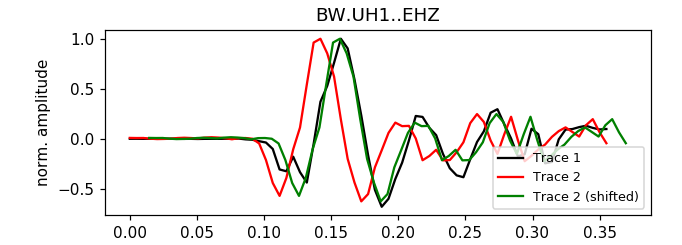

## 3.1 ADF 단위근 검정

In [11]:
adftest = round(rtn.apply(lambda x: adfuller(x, autolag = 'BIC')[0:2]).T,3)
adftest.columns = ['T-statics', 'P-values']

In [12]:
adftest

,T-statics,P-values
KQ.m@SHFE.cu,-140.964,0.0
KQ.m@SHFE.al,-21.095,0.0
KQ.m@SHFE.zn,-22.569,0.0
KQ.m@SHFE.rb,-24.340,0.0
KQ.m@SHFE.bu,-104.325,0.0
KQ.m@SHFE.hc,-100.967,0.0
KQ.m@SHFE.ag,-94.666,0.0
KQ.m@DCE.c,-19.531,0.0
KQ.m@DCE.cs,-20.466,0.0
KQ.m@DCE.a,-22.478,0.0


## 3.2 future list

In [13]:
exchange_list = rtn.columns.values
print(f"Exchange list: \n {exchange_list}")

Exchange list: 
 ['KQ.m@SHFE.cu' 'KQ.m@SHFE.al' 'KQ.m@SHFE.zn' 'KQ.m@SHFE.rb'
 'KQ.m@SHFE.bu' 'KQ.m@SHFE.hc' 'KQ.m@SHFE.ag' 'KQ.m@DCE.c' 'KQ.m@DCE.cs'
 'KQ.m@DCE.a' 'KQ.m@DCE.b' 'KQ.m@DCE.m' 'KQ.m@DCE.y' 'KQ.m@DCE.p'
 'KQ.m@DCE.l' 'KQ.m@DCE.pg' 'KQ.m@DCE.v' 'KQ.m@DCE.pp' 'KQ.m@DCE.i'
 'KQ.m@DCE.eg' 'KQ.m@CZCE.CF' 'KQ.m@CZCE.SR' 'KQ.m@CZCE.TA' 'KQ.m@CZCE.OI'
 'KQ.m@CZCE.MA' 'KQ.m@CZCE.FG' 'KQ.m@CZCE.ZC' 'KQ.m@CZCE.RM'
 'KQ.m@CZCE.SF' 'KQ.m@CZCE.SM' 'KQ.m@CZCE.AP' 'KQ.m@CZCE.SA'
 'KQ.m@CZCE.UR']


- Check p-value not only coefficient
- Use scipy.stats.pearsonr()

## 3.3 Cross-correlation

In [14]:
def _cross_correlation_pvalue(data, exchange, _lag):
    rtn = []
    if _lag >= 0:
        for i in data.columns:
            rtn.append(round(pearsonr(data[i][_lag:].values,data[exchange].shift(_lag)[_lag:].values)[1],6))
    else:
        for i in data.columns:
            rtn.append(round(pearsonr(data[i][:_lag].values,data[exchange].shift(_lag)[:_lag].values)[1],6))
        
    return pd.Series(np.array(rtn),index = data.columns)

def _cross_correlation_lead_lag_pvalue(data, exchange):
  return pd.concat(
      list(
          map(
              lambda _lag: pd.DataFrame(_cross_correlation_pvalue(data, exchange, _lag), columns=(f"lag_{exchange}_{_lag}",)), 
              [i for i in range(10)]
              )
          ), axis=1
          )

def _cross_correlation(data, exchange, _lag):
  return data.corrwith(data[exchange].shift(_lag))

def _cross_correlation_lead_lag(data, exchange):
  return pd.concat(
      list(
          map(
              lambda _lag: pd.DataFrame(_cross_correlation(data, exchange, _lag), columns=(f"lag_{exchange}_{_lag}",)), 
              [i for i in range(10)]
              )
          ), axis=1
          )

def cross_corr_lead_lag_all(data, exchange):
    cross_corr_lead_lag_result =  _cross_correlation_lead_lag(data, exchange).T
    cross_corr_lead_lag_pvalue_result =  _cross_correlation_lead_lag_pvalue(data, exchange).T
    return round(cross_corr_lead_lag_result, 6).astype(str)+ cross_corr_lead_lag_pvalue_result.applymap(lambda x: {x < 0.1 : '(*)', x < 0.05 : '(**)', x < 0.01 : '(***)'}.get(True,''))

In [15]:
cross_corr_lead_lag_all(rtn, rtn.columns[0])

,KQ.m@SHFE.cu,KQ.m@SHFE.al,KQ.m@SHFE.zn,KQ.m@SHFE.rb,KQ.m@SHFE.bu,KQ.m@SHFE.hc,KQ.m@SHFE.ag,KQ.m@DCE.c,KQ.m@DCE.cs,KQ.m@DCE.a,KQ.m@DCE.b,KQ.m@DCE.m,KQ.m@DCE.y,KQ.m@DCE.p,KQ.m@DCE.l,KQ.m@DCE.pg,KQ.m@DCE.v,KQ.m@DCE.pp,KQ.m@DCE.i,KQ.m@DCE.eg,KQ.m@CZCE.CF,KQ.m@CZCE.SR,KQ.m@CZCE.TA,KQ.m@CZCE.OI,KQ.m@CZCE.MA,KQ.m@CZCE.FG,KQ.m@CZCE.ZC,KQ.m@CZCE.RM,KQ.m@CZCE.SF,KQ.m@CZCE.SM,KQ.m@CZCE.AP,KQ.m@CZCE.SA,KQ.m@CZCE.UR
lag_KQ.m@SHFE.cu_0,1.0(***),0.088819(***),0.212406(***),0.134432(***),0.170265(***),0.192826(***),0.235781(***),0.027478(***),0.010337,0.017501(**),0.103476(***),0.105115(***),0.099478(***),0.051692(***),0.100507(***),0.109805(***),0.068248(***),0.08869(***),0.197598(***),0.046793(***),0.029129(***),0.110327(***),0.0286(***),0.038829(***),0.02662(***),0.049218(***),0.010903,0.068354(***),0.053974(***),0.067543(***),-0.006364,0.014019(*),0.02775(***)
lag_KQ.m@SHFE.cu_1,-0.081368(***),0.002105,0.011651,0.003685,-0.001123,0.008019,0.019398(**),-0.004461,0.00102,-0.004717,0.006938,0.017113(**),-0.005594,0.007044,0.004391,0.005948,-0.001232,0.006914,0.020088(***),-0.008461,-0.006394,-0.010514,5e-05,-0.001156,0.006963,-0.012523,-0.0005,-0.005741,-0.001276,0.027415(***),0.002859,-0.025075(***),0.013207(*)
lag_KQ.m@SHFE.cu_2,-0.016884(**),-0.011514,-0.022519(***),0.005865,-0.023505(***),0.000669,-0.010536,0.000658,0.006534,-0.012122,-0.007173,-0.002229,-0.006364,-0.00764,-0.011483,0.003897,-0.016977(**),-0.030877(***),-0.001382,0.003268,0.007519,-0.003702,-0.005306,0.005577,-0.009681,0.013708(*),-0.001223,0.00536,0.002695,0.004086,-0.003476,0.076142(***),0.007163
lag_KQ.m@SHFE.cu_3,0.002161,0.014753(*),0.010302,-0.000285,0.018854(**),0.011453,0.006737,-0.0005,-0.009605,0.004396,-0.016388(**),0.003301,-0.004154,0.001417,0.003594,0.009777,3.9e-05,0.036522(***),0.001882,-0.000315,-0.007134,-0.006832,0.013615(*),0.007263,0.004802,-0.004489,-0.000309,0.006192,0.011127,0.001276,0.010925,-0.054572(***),0.012051
lag_KQ.m@SHFE.cu_4,-0.007602,-0.01281(*),-0.009177,-0.006165,0.005181,-0.007291,0.00326,-0.005679,0.00462,-0.002032,0.014227(*),-6.9e-05,-0.013626(*),-0.004508,0.001823,-0.002021,0.010609,0.001902,-0.009921,0.004312,-0.001622,0.009495,-0.008164,-0.004123,0.001456,-0.016858(**),0.001512,0.001197,-0.003439,-0.000709,-0.00998,0.012299,-0.013626(*)
lag_KQ.m@SHFE.cu_5,-0.01239,-0.008807,0.004439,-0.010978,-0.001016,-0.00624,-0.009121,-0.006876,-0.008273,0.002966,0.004952,0.005225,0.008181,0.008266,0.003443,-0.004645,-0.001289,-0.019182(**),-0.004991,0.003192,0.010403,-0.010281,-0.002527,-0.000436,-0.008881,0.015231(**),-0.017511(**),0.004282,0.006307,0.002618,-0.004247,-0.005539,0.013973(*)
lag_KQ.m@SHFE.cu_6,0.029502(***),0.005746,0.00957,-0.003199,-0.015289(**),-0.001426,0.002184,0.0078,0.010751,-0.006524,-0.018796(**),3.2e-05,-0.00311,0.001157,0.002156,0.005323,-0.00997,0.015135(**),-0.01268(*),-0.008335,-0.010167,0.007951,0.000473,-0.012201,0.003483,-0.001907,0.018(**),0.001104,0.005017,-0.011999,0.004728,0.01457(*),-0.000646
lag_KQ.m@SHFE.cu_7,0.004387,0.00579,0.008588,-0.010974,0.007003,-0.005718,0.009088,0.006708,0.005768,-0.011073,0.007413,-0.00617,0.004632,0.004893,-0.012644,-0.014621(*),-0.003129,-0.012202,-0.003133,0.003151,0.001853,-0.009849,-0.007926,0.0001,0.007532,0.001742,-0.009075,-0.009295,-0.001701,-0.002708,0.001465,-0.011841,-0.007964
lag_KQ.m@SHFE.cu_8,-0.002568,-0.012141,-0.001738,0.011094,0.00152,-0.00013,-0.003163,-0.011776,-0.018841(**),0.007106,-0.002077,-0.008522,0.006298,0.015146(**),-0.004121,-0.00204,-0.009801,-0.001049,0.001468,-0.009419,-0.001343,0.006152,-0.001993,0.002612,-0.012639,-0.00286,0.005637,-0.000324,0.005182,-0.001391,-0.002824,-0.00574,-0.004191
lag_KQ.m@SHFE.cu_9,-0.004773,0.011508,0.007152,-0.008238,0.018189(**),0.004378,0.013788(*),0.009826,0.011353,0.010248,-0.00347,-0.001249,-0.005862,-0.020318(***),-0.01374(*),-0.008277,-0.004309,0.00214,0.003911,0.008655,0.005377,-0.010846,0.010674,-0.009381,0.0013,-0.014123(*),-0.000685,-0.010224,0.005349,0.000786,0.005077,0.011813,-0.011946


## VAR summary

In [16]:
from statsmodels.tsa.api import VAR

In [17]:
total = ["KQ.m@SHFE.cu", "KQ.m@SHFE.al", "KQ.m@SHFE.zn", "KQ.m@SHFE.rb", "KQ.m@SHFE.bu", "KQ.m@SHFE.hc", "KQ.m@SHFE.ag", "KQ.m@SHFE.au", "KQ.m@DCE.c", "KQ.m@DCE.cs", "KQ.m@DCE.a", "KQ.m@DCE.b", "KQ.m@DCE.m", "KQ.m@DCE.y", "KQ.m@DCE.p", "KQ.m@DCE.l", "KQ.m@DCE.pg", "KQ.m@DCE.v",
                 "KQ.m@DCE.pp", "KQ.m@DCE.i", "KQ.m@DCE.eg","KQ.m@CZCE.CF", "KQ.m@CZCE.SR", "KQ.m@CZCE.TA", "KQ.m@CZCE.OI", "KQ.m@CZCE.MA", "KQ.m@CZCE.FG", "KQ.m@CZCE.ZC", "KQ.m@CZCE.RM", "KQ.m@CZCE.SF",
                   "KQ.m@CZCE.SM", "KQ.m@CZCE.AP", "KQ.m@CZCE.SA", "KQ.m@CZCE.UR"]

In [18]:
pair_list = []
for i in range(len(total)):
    for j in range(len(total)):
        if i > j:
            pair_list.append([total[i], total[j]])

In [19]:
pair_list

[['KQ.m@SHFE.al', 'KQ.m@SHFE.cu'],
 ['KQ.m@SHFE.zn', 'KQ.m@SHFE.cu'],
 ['KQ.m@SHFE.zn', 'KQ.m@SHFE.al'],
 ['KQ.m@SHFE.rb', 'KQ.m@SHFE.cu'],
 ['KQ.m@SHFE.rb', 'KQ.m@SHFE.al'],
 ['KQ.m@SHFE.rb', 'KQ.m@SHFE.zn'],
 ['KQ.m@SHFE.bu', 'KQ.m@SHFE.cu'],
 ['KQ.m@SHFE.bu', 'KQ.m@SHFE.al'],
 ['KQ.m@SHFE.bu', 'KQ.m@SHFE.zn'],
 ['KQ.m@SHFE.bu', 'KQ.m@SHFE.rb'],
 ['KQ.m@SHFE.hc', 'KQ.m@SHFE.cu'],
 ['KQ.m@SHFE.hc', 'KQ.m@SHFE.al'],
 ['KQ.m@SHFE.hc', 'KQ.m@SHFE.zn'],
 ['KQ.m@SHFE.hc', 'KQ.m@SHFE.rb'],
 ['KQ.m@SHFE.hc', 'KQ.m@SHFE.bu'],
 ['KQ.m@SHFE.ag', 'KQ.m@SHFE.cu'],
 ['KQ.m@SHFE.ag', 'KQ.m@SHFE.al'],
 ['KQ.m@SHFE.ag', 'KQ.m@SHFE.zn'],
 ['KQ.m@SHFE.ag', 'KQ.m@SHFE.rb'],
 ['KQ.m@SHFE.ag', 'KQ.m@SHFE.bu'],
 ['KQ.m@SHFE.ag', 'KQ.m@SHFE.hc'],
 ['KQ.m@SHFE.au', 'KQ.m@SHFE.cu'],
 ['KQ.m@SHFE.au', 'KQ.m@SHFE.al'],
 ['KQ.m@SHFE.au', 'KQ.m@SHFE.zn'],
 ['KQ.m@SHFE.au', 'KQ.m@SHFE.rb'],
 ['KQ.m@SHFE.au', 'KQ.m@SHFE.bu'],
 ['KQ.m@SHFE.au', 'KQ.m@SHFE.hc'],
 ['KQ.m@SHFE.au', 'KQ.m@SHFE.ag'],
 ['KQ.m@DCE.c', 'KQ.

## 그래인저 인과관계

In [20]:
def granger_causality(rtn):
    
    model = VAR(rtn)
    results = model.fit(maxlags=30, ic='bic')

    corr = rtn.corr()
    temp_F = pd.DataFrame().reindex_like(corr)
    
    for i in rtn.columns:
        for j in rtn.columns:
            stat = results.test_causality(i,j).summary()
            if i != j:
                f = stat.data[1][0]
                p = stat.data[1][2]
                temp_F.loc[i,j] = str(np.round(f, 3)) + {p < 0.1 : '(*)', p < 0.05 : '(**)', p < 0.01 : '(***)'}.get(True,'')
            
            else:
                temp_F.loc[i,j] = '-'
    print(f"Model lag order is : {results.k_ar}")
    return temp_F.T

### 1분데이터 max lag 30

In [ ]:
'''for pair in pair_list:
    try:
        print(granger_causality(rtn[pair]))
    except RuntimeError:
        continue'''

'for pair in pair_list:\n    try:\n        print(granger_causality(sun_time_price[pair]))\n    except RuntimeError:\n        continue'

## 여기서 부터 유의한 그룹

In [21]:
print(granger_causality(rtn[['KQ.m@SHFE.cu', 'KQ.m@SHFE.al','KQ.m@SHFE.zn','KQ.m@SHFE.rb']]))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 3
             KQ.m@SHFE.cu KQ.m@SHFE.al KQ.m@SHFE.zn KQ.m@SHFE.rb
KQ.m@SHFE.cu            -  14.305(***)  56.463(***)  25.889(***)
KQ.m@SHFE.al        1.894            -        1.032        0.666
KQ.m@SHFE.zn        1.143   4.793(***)            -        1.504
KQ.m@SHFE.rb   6.201(***)        1.438    3.512(**)            -


In [ ]:
print(granger_causality(rtn[['KQ.m@SHFE.cu','KQ.m@DCE.b','KQ.m@DCE.m']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 3
             KQ.m@SHFE.cu   KQ.m@DCE.b  KQ.m@DCE.m
KQ.m@SHFE.cu            -   5.446(***)  3.868(***)
KQ.m@DCE.b          1.871            -  7.118(***)
KQ.m@DCE.m          1.467  87.919(***)           -


In [ ]:
print(granger_causality(rtn[['KQ.m@SHFE.cu','KQ.m@CZCE.SR','KQ.m@CZCE.SM']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 4
             KQ.m@SHFE.cu KQ.m@CZCE.SR KQ.m@CZCE.SM
KQ.m@SHFE.cu            -   4.143(***)    5.65(***)
KQ.m@CZCE.SR        0.922            -     2.137(*)
KQ.m@CZCE.SM        0.388        0.543            -


In [ ]:
print(granger_causality(rtn[['KQ.m@SHFE.cu','KQ.m@CZCE.SR','KQ.m@CZCE.SM','KQ.m@CZCE.UR']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 4
             KQ.m@SHFE.cu KQ.m@CZCE.SR KQ.m@CZCE.SM KQ.m@CZCE.UR
KQ.m@SHFE.cu            -   4.042(***)    5.48(***)   5.043(***)
KQ.m@CZCE.SR        0.882            -     2.042(*)    5.02(***)
KQ.m@CZCE.SM        0.363        0.524            -     2.342(*)
KQ.m@CZCE.UR        1.245        0.923     2.322(*)            -


In [ ]:
print(granger_causality(rtn[['KQ.m@SHFE.bu', 'KQ.m@SHFE.al','KQ.m@SHFE.zn']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 4
             KQ.m@SHFE.bu KQ.m@SHFE.al KQ.m@SHFE.zn
KQ.m@SHFE.bu            -   3.663(***)   7.623(***)
KQ.m@SHFE.al        1.105            -     2.243(*)
KQ.m@SHFE.zn     2.308(*)   7.759(***)            -


In [ ]:
print(granger_causality(rtn[['KQ.m@SHFE.bu', 'KQ.m@DCE.b', 'KQ.m@CZCE.MA']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 9
             KQ.m@SHFE.bu  KQ.m@DCE.b KQ.m@CZCE.MA
KQ.m@SHFE.bu            -  3.732(***)   6.054(***)
KQ.m@DCE.b          0.718           -     1.635(*)
KQ.m@CZCE.MA        1.346       0.603            -


In [ ]:
print(granger_causality(rtn[['KQ.m@SHFE.hc', 'KQ.m@DCE.i', 'KQ.m@DCE.b','KQ.m@DCE.l']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 2
             KQ.m@SHFE.hc   KQ.m@DCE.i  KQ.m@DCE.b KQ.m@DCE.l
KQ.m@SHFE.hc            -  48.271(***)    2.374(*)   2.894(*)
KQ.m@DCE.i     5.787(***)            -  6.989(***)   2.532(*)
KQ.m@DCE.b          0.917        0.055           -       2.04
KQ.m@DCE.l       2.538(*)        2.011       1.679          -


In [ ]:
print(granger_causality(rtn[['KQ.m@SHFE.hc', 'KQ.m@SHFE.al','KQ.m@SHFE.zn','KQ.m@SHFE.rb','KQ.m@SHFE.ag']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 3
             KQ.m@SHFE.hc KQ.m@SHFE.al KQ.m@SHFE.zn  KQ.m@SHFE.rb KQ.m@SHFE.ag
KQ.m@SHFE.hc            -    2.647(**)   11.16(***)  284.831(***)     2.589(*)
KQ.m@SHFE.al        0.527            -     2.227(*)         0.764    2.759(**)
KQ.m@SHFE.zn        0.372   9.106(***)            -         1.268        0.651
KQ.m@SHFE.rb     5.4(***)        1.091        0.917             -        0.136
KQ.m@SHFE.ag        0.791    3.614(**)   9.777(***)         1.341            -


In [ ]:
print(granger_causality(rtn[['KQ.m@SHFE.hc', 'KQ.m@CZCE.RM','KQ.m@CZCE.SR','KQ.m@CZCE.UR']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 4
             KQ.m@SHFE.hc KQ.m@CZCE.RM KQ.m@CZCE.SR KQ.m@CZCE.UR
KQ.m@SHFE.hc            -    2.391(**)   4.848(***)   7.558(***)
KQ.m@CZCE.RM         1.15            -   4.143(***)        0.848
KQ.m@CZCE.SR        0.666   4.132(***)            -   4.889(***)
KQ.m@CZCE.UR         0.47        0.489         0.99            -


In [ ]:
print(granger_causality(rtn[['KQ.m@SHFE.ag', 'KQ.m@SHFE.rb','KQ.m@DCE.b','KQ.m@DCE.m']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 3
             KQ.m@SHFE.ag KQ.m@SHFE.rb   KQ.m@DCE.b  KQ.m@DCE.m
KQ.m@SHFE.ag            -   5.777(***)   4.457(***)   3.043(**)
KQ.m@SHFE.rb        1.278            -   4.171(***)    2.501(*)
KQ.m@DCE.b           0.59    2.785(**)            -  7.025(***)
KQ.m@DCE.m          0.325        0.927  86.054(***)           -


In [ ]:
print(granger_causality(rtn[['KQ.m@DCE.m','KQ.m@CZCE.RM','KQ.m@DCE.b']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 4
              KQ.m@DCE.m KQ.m@CZCE.RM   KQ.m@DCE.b
KQ.m@DCE.m             -  99.616(***)  47.251(***)
KQ.m@CZCE.RM  9.027(***)            -        1.777
KQ.m@DCE.b    5.211(***)    2.629(**)            -


In [ ]:
print(granger_causality(rtn[['KQ.m@DCE.m','KQ.m@CZCE.RM','KQ.m@CZCE.SR']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 4
              KQ.m@DCE.m  KQ.m@CZCE.RM KQ.m@CZCE.SR
KQ.m@DCE.m             -  130.211(***)   4.291(***)
KQ.m@CZCE.RM  10.23(***)             -        1.068
KQ.m@CZCE.SR       1.109     2.702(**)            -


In [ ]:
print(granger_causality(rtn[['KQ.m@DCE.m','KQ.m@DCE.cs','KQ.m@DCE.b']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 7
             KQ.m@DCE.m KQ.m@DCE.cs   KQ.m@DCE.b
KQ.m@DCE.m            -  4.525(***)  41.201(***)
KQ.m@DCE.cs    1.732(*)           -        0.929
KQ.m@DCE.b   3.978(***)   2.039(**)            -


In [ ]:
print(granger_causality(rtn[['KQ.m@DCE.pg','KQ.m@SHFE.rb','KQ.m@SHFE.bu']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 3
             KQ.m@DCE.pg KQ.m@SHFE.rb KQ.m@SHFE.bu
KQ.m@DCE.pg            -   10.25(***)  11.598(***)
KQ.m@SHFE.rb       0.372            -   5.375(***)
KQ.m@SHFE.bu       1.261  14.319(***)            -


In [ ]:
print(granger_causality(rtn[['KQ.m@DCE.l','KQ.m@DCE.v','KQ.m@DCE.pp']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 14
              KQ.m@DCE.l KQ.m@DCE.v  KQ.m@DCE.pp
KQ.m@DCE.l             -  8.94(***)  37.896(***)
KQ.m@DCE.v    6.029(***)          -   3.837(***)
KQ.m@DCE.pp  10.109(***)      1.473            -


In [ ]:
print(granger_causality(rtn[['KQ.m@DCE.i','KQ.m@DCE.v','KQ.m@DCE.b','KQ.m@DCE.p','KQ.m@DCE.m']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 5
           KQ.m@DCE.i  KQ.m@DCE.v   KQ.m@DCE.b   KQ.m@DCE.p  KQ.m@DCE.m
KQ.m@DCE.i          -  8.033(***)    4.38(***)   5.535(***)    2.207(*)
KQ.m@DCE.v      1.323           -        0.605   3.111(***)       1.645
KQ.m@DCE.b      0.163       0.215            -  12.602(***)  4.744(***)
KQ.m@DCE.p      1.375       0.516    4.89(***)            -       0.859
KQ.m@DCE.m      1.453       1.713  55.573(***)         0.89           -


In [ ]:
print(granger_causality(rtn[['KQ.m@DCE.i','KQ.m@SHFE.al','KQ.m@SHFE.rb' ]]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 7
              KQ.m@DCE.i KQ.m@SHFE.al KQ.m@SHFE.rb
KQ.m@DCE.i             -   4.231(***)  70.595(***)
KQ.m@SHFE.al    2.009(*)            -        0.764
KQ.m@SHFE.rb  6.309(***)        0.591            -


In [ ]:
print(granger_causality(rtn[['KQ.m@DCE.i','KQ.m@CZCE.RM','KQ.m@CZCE.FG','KQ.m@CZCE.OI' ]]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 30
             KQ.m@DCE.i KQ.m@CZCE.RM KQ.m@CZCE.FG KQ.m@CZCE.OI
KQ.m@DCE.i            -   1.969(***)   4.457(***)   3.629(***)
KQ.m@CZCE.RM      1.039            -        0.526  32.723(***)
KQ.m@CZCE.FG      1.303        0.401            -        0.519
KQ.m@CZCE.OI      1.036   31.49(***)        0.214            -


In [ ]:
print(granger_causality(rtn[['KQ.m@CZCE.RM', 'KQ.m@DCE.a','KQ.m@DCE.p']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 17
             KQ.m@CZCE.RM  KQ.m@DCE.a  KQ.m@DCE.p
KQ.m@CZCE.RM            -  4.133(***)  3.726(***)
KQ.m@DCE.a          0.342           -        0.34
KQ.m@DCE.p          0.889       0.646           -


In [ ]:
print(granger_causality(rtn[['KQ.m@CZCE.SF','KQ.m@SHFE.rb', 'KQ.m@SHFE.bu','KQ.m@DCE.i']]))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Model lag order is : 3
             KQ.m@CZCE.SF  KQ.m@SHFE.rb KQ.m@SHFE.bu   KQ.m@DCE.i
KQ.m@CZCE.SF            -    6.284(***)    2.606(**)   5.777(***)
KQ.m@SHFE.rb        1.146             -     3.33(**)  12.741(***)
KQ.m@SHFE.bu        1.953     7.51(***)            -   6.472(***)
KQ.m@DCE.i          1.249  141.257(***)    4.06(***)            -
